In [1]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
!pip install beautifulsoup4

In [503]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from dateutil import parser
import missingno as msno
import re
from scipy.stats import mode
import spacy
import tqdm
import pickle
from bs4 import BeautifulSoup
from spacy.matcher import Matcher
import networkx as nx

In [4]:
pd.set_option("display.max_column",500)
pd.set_option("display.max_rows",500)
sns.set(style="darkgrid")
sns.set_context("talk")

In [5]:
#load data
data=pd.read_csv(r"E:\Python\Msc-AI-Projects\loan.csv",low_memory=False)

In [6]:
#Function to create meta data of the data
def create_Meta(data):
    meta_data={'dtypes':data.dtypes,
              'missing_values':round(data.isna().sum()*100/data.shape[0],3),
              'count':[data[i].count() for i in data.columns.values],
              'Number_Uniques':[data[i].nunique() for i in data.columns.values]}
    return pd.DataFrame(meta_data)

In [7]:
Meta_Data=create_Meta(data)

In [8]:
#Display meta data of our data
Meta_Data.T

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
dtypes,int64,int64,int64,int64,float64,object,object,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,float64,int64,object,int64,float64,float64,int64,int64,int64,object,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,object,float64,float64,int64,object,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
missing_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.191,2.707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.581,0.0,0.028,0.0,0.0,0.0,0.0,0.0,0.0,64.662,92.985,0.0,0.0,0.0,0.126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179,0.0,97.13,0.005,0.141,100.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.141,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.755,0.098,100.0,100.0,100.0,100.0
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39717,39717,39717,14035,2786,39717,39717,39717,39667,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,39646,39717,1140,39715,39661,0,39717,39717,0,0,0,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39661,39717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39020,39678,0,0,0,0
Number_Uniques,39717,39717,885,1041,8205,2,371,15383,7,35,28820,11,5,5318,3,55,3,1,39717,26527,14,19615,823,50,2868,11,526,9,95,111,40,5,21711,1089,82,1,1137,1138,37850,37518,7976,35148,1356,4040,2616,101,34930,2,106,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0


In [9]:
#Sorting Meta Data on the basis of missing value percentage in descending order
Meta_Data=Meta_Data.sort_values(by='missing_values',ascending=False)

In [10]:
#Slicing Meta Data on basis of missing value percentage which shall be greater than 30%
Meta_Data[Meta_Data['missing_values']>30]

,dtypes,missing_values,count,Number_Uniques
verification_status_joint,float64,100.000,0,0
annual_inc_joint,float64,100.000,0,0
mo_sin_old_rev_tl_op,float64,100.000,0,0
mo_sin_old_il_acct,float64,100.000,0,0
bc_util,float64,100.000,0,0
bc_open_to_buy,float64,100.000,0,0
avg_cur_bal,float64,100.000,0,0
acc_open_past_24mths,float64,100.000,0,0
inq_last_12m,float64,100.000,0,0
total_cu_tl,float64,100.000,0,0


In [11]:
#We have noticed that there are many columns which have more than 90 percent missing values
# There are columns which have 30% and 64% missing values also . 
#We will drop columns having missing values more than 50% and for rest we will explore and then take a call
missing_value_columns=Meta_Data[Meta_Data['missing_values']>50].index

In [12]:
#Dropped missing value columns
ft_data=data.drop(missing_value_columns,axis=1)

In [13]:
#Shape after and before dropping missing value columns
#We notice that 50% approx columns have been dropped
ft_data.shape,data.shape

((39717, 54), (39717, 111))

In [14]:
ft_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
def find_pattern(x):
    r=r"[0-9]"
    start,end=re.search(r,x).span()
    x=x[start:end+1]
    return x

In [16]:
indx=ft_data[ft_data["emp_length"].notnull()]['emp_length'].index.values.tolist()
ft_data['emp_length'].loc[indx,]=ft_data['emp_length'].loc[indx,].map(find_pattern)

In [17]:
#data cleaning
def data_split(a,x,y):
    b=a.split(x)[y]
    return b

ft_data['term']=ft_data.term.apply(data_split,args=(" ",1))


In [18]:
ft_data["int_rate"]=ft_data.int_rate.apply(data_split,args=("%",0))

In [19]:

# ft_data['emp_length'].loc[indx,]=ft_data['emp_length'].loc[indx,].apply(data_split,args=("+",0))
indx=ft_data[ft_data["revol_util"].notnull()]['revol_util'].index.values.tolist()
ft_data['revol_util'].loc[indx,]=ft_data['revol_util'].loc[indx,].apply(data_split,args=("%",0))

In [20]:
#Checking if missing data is not at Random
#Creating dichotomous column for missing variable,1->missing,0->not missing
ft_data['desc_isMissing']=np.where(ft_data['desc'].isna(),1,0)
ft_data['emp_title_isMissing']=np.where(ft_data['emp_title'].isna(),1,0)
ft_data['emp_length_isMissing']=np.where(ft_data['emp_length'].isna(),1,0)

In [21]:
ft_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

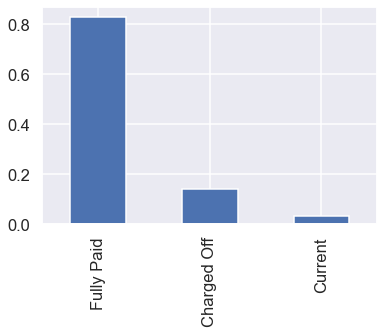

In [22]:
#We find that 80% of description of loan provided by borrower is missing for those who have fully paid 
ft_data[ft_data.desc_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

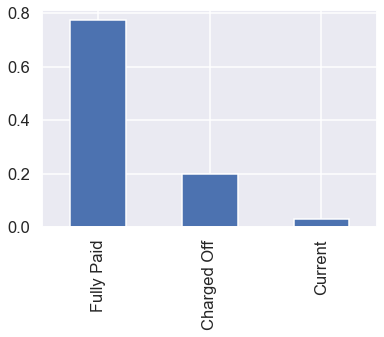

In [23]:
#We find that 80% of job title provided by borrower is missing for those who have fully paid
ft_data[ft_data.emp_title_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

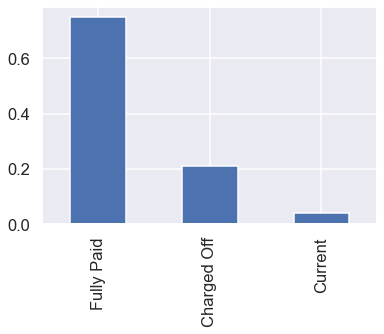

In [24]:
#We find that 70% of job tenure provided by borrower is missing for those who have fully paid
ft_data[ft_data.emp_length_isMissing==1]['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()

It has been seen that majority of the missing data are of those who have fully paid, that is those who are likely to fully pay the loan amount. Hence we can say that the missing data is not at random. There is a clear pattern which we can see

In [25]:
descMissing_data=ft_data[ft_data.desc_isMissing==1]

In [26]:
descMissing_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,desc_isMissing,emp_title_isMissing,emp_length_isMissing
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0000,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,1,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.0,0.0000,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,0,0
11,1069908,1305008,12000,12000,12000.0,36,12.69,402.54,B,B5,UCLA,10,OWN,75000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10,34,f,0.0,0.0,13947.989160,13947.99,12000.00,1947.99,0.0,0.0,0.0000,Sep-13,6315.30,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,0,0
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,SFMTA,3,RENT,100000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.50,29,f,0.0,0.0,7471.990000,7471.99,5433.47,1393.42,0.0,645.1,6.3145,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,0,0
15,1069759,1304871,1000,1000,1000.0,36,16.29,35.31,D,D1,Internal revenue Service,1,RENT,28000.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,641xx,MO,20.31,0,Sep-07,1,11,0,6524,81.50,23,f,0.0,0.0,1270.716942,1270.72,1000.00,270.72,0.0,0.0,0.0000,Jan-15,36.32,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1,0,0


In [27]:
print(descMissing_data.loan_amnt.mean(),ft_data[ft_data.desc_isMissing==0]['loan_amnt'].mean(),ft_data['loan_amnt'].mean())

10585.99884080371 11525.55644769765 11219.443814991062


In [28]:
print(descMissing_data.funded_amnt.mean(),ft_data[ft_data.desc_isMissing==0]['funded_amnt'].mean(),ft_data['funded_amnt'].mean())

10373.154945904173 11225.368786645255 10947.713195860715


In [29]:
descMissing_data.term.value_counts()

36    9248
60    3692
Name: term, dtype: int64

In [30]:
ft_data[ft_data.desc_isMissing==0]['term'].value_counts()

36    19848
60     6929
Name: term, dtype: int64

We see that distribution of term on the basis of description missing and not missing are similar that is loan applicants prefference for 3 years is twice more than of 5 years

In [31]:
ft_data.int_rate=ft_data.int_rate.astype('float64')
descMissing_data.int_rate=descMissing_data.int_rate.astype('float64')
print(descMissing_data.int_rate.mean(),ft_data[ft_data.desc_isMissing==0].int_rate.mean(),ft_data.int_rate.mean())

11.995565687789716 12.033553049259668 12.02117657426169


In [32]:
ft_data.emp_length=ft_data.emp_length.astype('float64')
descMissing_data.emp_length=descMissing_data.emp_length.astype('float64')
print(descMissing_data.emp_length.mean(),ft_data[ft_data.desc_isMissing==0].emp_length.mean(),ft_data.emp_length.mean())

5.37983193277311 4.95452633189276 5.092050100926453


In [33]:
ft_data.revol_util=ft_data.revol_util.astype('float64')
descMissing_data.revol_util=descMissing_data.revol_util.astype('float64')
print(descMissing_data.revol_util.mean(),ft_data[ft_data.desc_isMissing==0].revol_util.mean(),ft_data.revol_util.mean())

49.29169606932862 48.610070298770054 48.83215241888721


No clear pattern in interest rate, revol util and employee length seen for missing description and non missing data 

In [34]:
#Try Finding Employee Length based on Title and imputing the missings
title_wise_empLen=ft_data.groupby('emp_title',as_index=False,dropna=True)['emp_length'].median()

In [35]:
emp_title_NA_Length=ft_data[(~ft_data.emp_title.isna())&(ft_data.emp_length.isna())]['emp_title'].values.tolist()

In [36]:
a=pd.DataFrame()
for i in emp_title_NA_Length:
    a=pd.concat([a,title_wise_empLen[title_wise_empLen.emp_title==i]],axis=0)

In [37]:
emp_title=a[~a.emp_length.isna()].emp_title.tolist()

In [38]:
indexes=[]
for i in emp_title:
    ind=ft_data[(ft_data.emp_title==i)&(ft_data.emp_length.isna())]['emp_length'].index.values[0]
    indexes.append(ind)

In [39]:
indexes

[5936, 6631, 7661, 19179, 20772, 22816, 25010, 25322, 26181, 29984, 31126]

In [40]:
missing_emp_length_data=ft_data.loc[indexes,:]
emp_lnt=a[~a.emp_length.isna()].emp_length.tolist()    
missing_emp_length_data.loc[:,'emp_length']=emp_lnt


In [41]:
ft_data=pd.concat([ft_data.drop(indexes,axis=0),missing_emp_length_data],axis=0)

In [42]:
ft_data.reset_index(drop=True,inplace=True)

In [43]:
indexes=ft_data[(ft_data.emp_length.isna())].index.values.tolist()

In [44]:
#Dropping rows where emp_length is NA
ft_data.drop(indexes,axis=0,inplace=True)

In [45]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      3.725455
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [46]:
#Grouping employee title most frequent based on employee experience
#Treating Missing Values of Employee title
empTitle_by_Length=ft_data.groupby("emp_length",as_index=False).agg({"emp_title":mode})
for i in range(len(empTitle_by_Length)):
    empTitle_by_Length.emp_title[i]=empTitle_by_Length.emp_title[i].mode[0]

In [47]:
empTitle_by_Length

,emp_length,emp_title
0,1.0,Bank of America
1,2.0,Bank of America
2,3.0,Kaiser Permanente
3,4.0,Self Employed
4,5.0,Bank of America
5,6.0,US Army
6,7.0,US Army
7,8.0,US Army
8,9.0,UPS
9,9.5,Honeywell


In [48]:
indexes=ft_data[ft_data.emp_title.isna()].index.values.tolist()
empTitle_NAdata=ft_data.loc[indexes,:]
empTitle_NAdata[(empTitle_NAdata.emp_length==1.0)&(empTitle_NAdata.emp_title.isna())]["emp_title"].replace(np.nan,"Bank of America",inplace=True)

In [49]:
empTitle_NAdata.emp_length.value_counts().sum()

1440

In [50]:
#Imputation of missing values in employee title based on employee length
a=pd.DataFrame()
for i in empTitle_NAdata.emp_length.unique().tolist():
    dummy=empTitle_NAdata[(empTitle_NAdata.emp_length==i)&(empTitle_NAdata.emp_title.isna())]
    dummy.emp_title.replace(np.nan,empTitle_by_Length[empTitle_by_Length.emp_length==i].emp_title.values[0],inplace=True)
    a=pd.concat([dummy,a],axis=0)
    
ft_data=pd.concat([ft_data.drop(indexes,axis=0),a],axis=0)

In [51]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [52]:
ft_data['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    36386
1.0     1563
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [53]:
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'loan_status':np.count_nonzero})

,loan_status
pub_rec_bankruptcies,
0.0,36386
1.0,1563
2.0,7
NaN,697


In [54]:
#We notice the 697 missing public record of bankcruptcies are not the ones which are either charged off or who have fully paid..
#They belong to Current loan applicants
#Either this NaN can be another category itself or they belong to one specific category
ft_data[ft_data['pub_rec_bankruptcies'].isna()].groupby("loan_status",dropna=False)["pub_rec_bankruptcies"].count()

loan_status
Charged Off    0
Fully Paid     0
Name: pub_rec_bankruptcies, dtype: int64

In [55]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount
#We see that those who have frequently shown bankcruptcies are the ones who have applied for high loan amounts. 
#The missing 697 are the ones which have applied for least loan amount
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'loan_amnt':'mean'})

,loan_amnt
pub_rec_bankruptcies,
0.0,11367.429094
1.0,10094.369802
2.0,12800.000000
NaN,9956.420373


In [56]:
#Understanding the behavior of bunkcruptcies on basis of average funded amount
#There is difference in loan applied amount and funded amount
#We see that those who do not have bankcruptcies or who have maximum record of bankcruptcies that is 2 have the highest amount funded. 
#The missing 697 are the ones which have got lesser funded amount
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'funded_amnt':'mean'})

,funded_amnt
pub_rec_bankruptcies,
0.0,11090.209146
1.0,9815.962892
2.0,12453.571429
NaN,9829.878049


In [57]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and loan status
#We see for all the number of bankcruptcies, people who have fully paid are the ones who have applied for the least amount and those who are current have the highest loan amount.
#For NAN category those whose loan is being charged off has the highest loan amount 
ft_data.groupby(['pub_rec_bankruptcies','loan_status'],dropna=False).agg({'loan_amnt':'mean'})

loan_amnt
pub_rec_bankruptcies loan_status              
0.0                  Charged Off  12274.934290
                     Current      17307.260338
                     Fully Paid   11011.605379
1.0                  Charged Off  11677.388060
                     Current      13053.030303
                     Fully Paid    9568.891213
2.0                  Charged Off  12500.000000
                     Current      25000.000000
                     Fully Paid    4866.666667
NaN                  Charged Off  12590.042373
                     Fully Paid    9419.689119

In [58]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and loan status
#We see for all the number of bankcruptcies, people who have fully paid are in majority numbers and the current applicants are the least
#Of NaNs i.e 697 applicants 83% are already paid off and only 17% have been charged of
ft_data.groupby(['pub_rec_bankruptcies','loan_status'],dropna=False).agg({'loan_amnt':'count'})

loan_amnt
pub_rec_bankruptcies loan_status           
0.0                  Charged Off       4946
                     Current           1064
                     Fully Paid       30376
1.0                  Charged Off        335
                     Current             33
                     Fully Paid        1195
2.0                  Charged Off          2
                     Current              2
                     Fully Paid           3
NaN                  Charged Off        118
                     Fully Paid         579

In [59]:
#Understanding the behavior of bunkcruptcies on basis of average interest rate
#We see that as the number of bankruptcies increases, it increases when the average interest rate rises. 
#The missing 697 have the least interest rate @11% approximately
ft_data.groupby('pub_rec_bankruptcies',dropna=False).agg({'int_rate':'mean'})

,int_rate
pub_rec_bankruptcies,
0.0,12.014279
1.0,13.539264
2.0,15.971429
NaN,10.640230


In [60]:
#Understanding the behavior of bunkcruptcies on basis of average loan amount and installment amount
#We see for all the number of bankcruptcies, people who have public record of bankcruptcies as two, pays highest isntallment
#For NAN category the installment is lesser comparatively
ft_data.groupby(['pub_rec_bankruptcies'],dropna=False).agg({'installment':'mean'})

,installment
pub_rec_bankruptcies,
0.0,328.144650
1.0,295.598298
2.0,373.270000
NaN,322.301119


In [61]:
#We see for zero and NaN category of the public record of bankcruptcies, majority of the applicants have home ownership as Rent and then Mortgage
#Those who displays bankcruptcies have higher frequencies of martgage as home ownership
ft_data.groupby(["pub_rec_bankruptcies","home_ownership"],dropna=False).agg({"emp_title":"count"})

emp_title
pub_rec_bankruptcies home_ownership           
0.0                  MORTGAGE            16136
                     OTHER                  95
                     OWN                  2683
                     RENT                17472
1.0                  MORTGAGE              822
                     OTHER                   3
                     OWN                    99
                     RENT                  639
2.0                  MORTGAGE                6
                     RENT                    1
NaN                  MORTGAGE              252
                     NONE                    3
                     OWN                    62
                     RENT                  380

In [62]:
#Since the patterns seen above we see lot of similarities in NaN category and bankcruotcies class 0 , which is suggestive of that applicants who are having public_bankcrupticies as NaN have zero bankcruptcies
#Hence We can impute NaNs with 0
ft_data.pub_rec_bankruptcies.fillna(0.0,inplace=True)

In [63]:
ft_data.isna().sum()*100/ft_data.shape[0]

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      0.000000
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.339016
purpose                        0.000000
title                          0.025871
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [64]:
len(ft_data[~ft_data.desc.isna()].index)

26153

In [65]:
ft_data.desc[0]

'  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'

In [66]:
nlp=spacy.load("en_core_web_md")

In [67]:
stop_words=nlp.Defaults.stop_words

In [519]:
def remove_stopwords(text):
    if len(str(text))>0:
    
        nlp=spacy.load("en_core_web_md")
        stop_words=nlp.Defaults.stop_words
        text=[word for word in str(text).split(" ") if word.lower() not in stop_words]
        return " ".join([i for i in text])
    return " "

ft_data['cleaned_desc']=ft_data['desc'].map(remove_stopwords)

cleaned_desc=[]
for i in tqdm.tqdm(ft_data['desc']):
    cleaned_desc.append(remove_stopwords(i))

In [521]:
ft_data['cleaned_desc']=ft_data['cleaned_desc'].map(remove_stopwords)

  0%|                                                                                      | 0/38653 [1:51:56<?, ?it/s]


In [523]:
ft_data['cleaned_desc'].head(20)

0     Borrower added 12/22/11 > plan use money finan...
1     Borrower added 12/21/11 > pay property tax (bo...
2     Borrower added 12/21/11 > plan combining large...
3                                                   nan
4     Borrower added 12/18/11 > planning funds pay r...
5            Borrower added 12/16/11 > Downpayment car.
6     Borrower added 12/16/11 > I'm trying build cre...
7     Borrower added 12/15/11 > recived loan Citi Fi...
8                                                   nan
9     Borrower added 12/15/11 > Plan pay 2 charge ac...
10    Borrower added 12/19/11 > intend pay debt half...
11                                                  nan
12                                                  nan
13                                                  nan
14    Borrower added 12/15/11 > Payoff lending club ...
15    Borrower added 12/16/11 > loan looking forward...
16                                                  nan
17    amassing credit card debt years college, s

In [524]:
ft_data.to_pickle(r"E:\Python\Msc-AI-Projects\ft_data.pkl")

In [525]:
#Remove HTML tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [526]:
ft_data['cleaned_desc']=ft_data['cleaned_desc'].map(strip_html_tags)

In [527]:
ft_data['cleaned_desc']=ft_data['cleaned_desc'].map(lambda x: str(x).strip())

In [528]:
ft_data['cleaned_desc'][0]

'Borrower added 12/22/11 > plan use money finance motorcycle looking at. plan paid soon possible/when sell old bike. need money deal im looking good pass up.  Borrower added 12/22/11 > plan use money finance motorcycle looking at. plan paid soon possible/when sell old bike.I need money deal im looking good pass up. finished college associates degree business takingmeplaces'

In [529]:
doc=nlp(ft_data['cleaned_desc'][0])
for tok in doc:
    print(tok.text," ----> ",tok.dep_," ----> ",tok.pos_)

Borrower  ---->  nsubj  ---->  PROPN
added  ---->  ROOT  ---->  VERB
12/22/11  ---->  dobj  ---->  NUM
>  ---->  compound  ---->  PUNCT
plan  ---->  nsubj  ---->  NOUN
use  ---->  ccomp  ---->  VERB
money  ---->  compound  ---->  NOUN
finance  ---->  compound  ---->  NOUN
motorcycle  ---->  dobj  ---->  NOUN
looking  ---->  acl  ---->  VERB
at  ---->  prep  ---->  ADP
.  ---->  punct  ---->  PUNCT
plan  ---->  nsubj  ---->  NOUN
paid  ---->  ROOT  ---->  VERB
soon  ---->  advmod  ---->  ADV
possible  ---->  dobj  ---->  ADJ
/  ---->  punct  ---->  PUNCT
when  ---->  advmod  ---->  SCONJ
sell  ---->  advcl  ---->  VERB
old  ---->  amod  ---->  ADJ
bike  ---->  dobj  ---->  NOUN
.  ---->  punct  ---->  PUNCT
need  ---->  ROOT  ---->  VERB
money  ---->  compound  ---->  NOUN
deal  ---->  dobj  ---->  NOUN
i  ---->  nsubj  ---->  PRON
m  ---->  aux  ---->  AUX
looking  ---->  ROOT  ---->  VERB
good  ---->  amod  ---->  ADJ
pass  ---->  ccomp  ---->  VERB
up  ---->  prt  ---->  ADP
.  ---->

In [530]:
ft_data['cleaned_desc'][1]

"Borrower added 12/21/11 > pay property tax (borrow friend, need pay back) & central A/C need replace. I'm sorry let loan expired time."

In [489]:
def get_entities(sent):
    
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################

    for tok in nlp(sent):
        
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
          # check: token is a compound word or not
          if tok.dep_ == "compound":
            prefix = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                prefix = prv_tok_text + " "+ tok.text

          # check: token is a modifier or not
          if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text

          ## chunk 3
          if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

          ## chunk 4
          if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text

          ## chunk 5  
        # update variables
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
      #############################################################
    return [ent1.strip(), ent2.strip()]


In [490]:

entity_pairs = []

for i in tqdm.tqdm(ft_data['cleaned_desc']):
    entity_pairs.append(get_entities(i))

100%|███████████████████████████████████████████████████████████████████████████| 38653/38653 [05:21<00:00, 120.14it/s]


In [500]:
def get_relation(sent):
    doc = nlp(sent)
    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}]
    matcher.add("matching_1",[pattern]) 
    matches = matcher(doc)
    k = len(matches) 
    if k<1:
        return " "
    else:
        span = doc[matches[k][1]:matches[k][2]] 
        return(span.text)

In [501]:
relations = [get_relation(i) for i in tqdm.tqdm(ft_data['cleaned_desc'])]

100%|███████████████████████████████████████████████████████████████████████████| 38653/38653 [05:28<00:00, 117.78it/s]


In [502]:
relations

['finished',
 "'m sorry",
 'love',
 ' ',
 'pay',
 ' ',
 'looking',
 'paying',
 ' ',
 'decreased ONLY',
 'repay',
 ' ',
 ' ',
 ' ',
 ' ',
 'Thanks',
 ' ',
 'repayment',
 'Thank',
 'accounts',
 ' ',
 ' ',
 ' ',
 ' ',
 'need',
 ' ',
 'thank',
 'looking',
 ' ',
 'Thank',
 ' ',
 'Worked',
 'business',
 'appreciate',
 'For',
 'loan',
 'problems',
 'payoff high',
 ' ',
 ' ',
 'experience',
 ' ',
 ' ',
 ' ',
 ' ',
 'beat',
 'missed',
 ' ',
 ' ',
 'reach',
 ' ',
 'missed',
 ' ',
 'expenses',
 'b great',
 'job',
 'pay',
 'looking',
 ' ',
 ' ',
 'pay',
 'pay',
 ' ',
 'calculated',
 'With',
 ' ',
 ' ',
 'Thanks',
 'help',
 ' ',
 ' ',
 'choose',
 ' ',
 'pay',
 ' ',
 ' ',
 'expect',
 ' ',
 ' ',
 ' ',
 'pay',
 'worth',
 ' ',
 'help',
 'saving',
 'plan',
 ' ',
 'job',
 ' ',
 ' ',
 ' ',
 'debit',
 ' ',
 'opportunities',
 'alotted',
 'help',
 'years',
 'wish',
 'Thank',
 ' ',
 'better',
 ' ',
 ' ',
 'lived present',
 ' ',
 ' ',
 ' ',
 ' ',
 'years',
 ' ',
 'attempting close',
 ' ',
 ' ',
 ' ',
 'care',


In [504]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [505]:

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

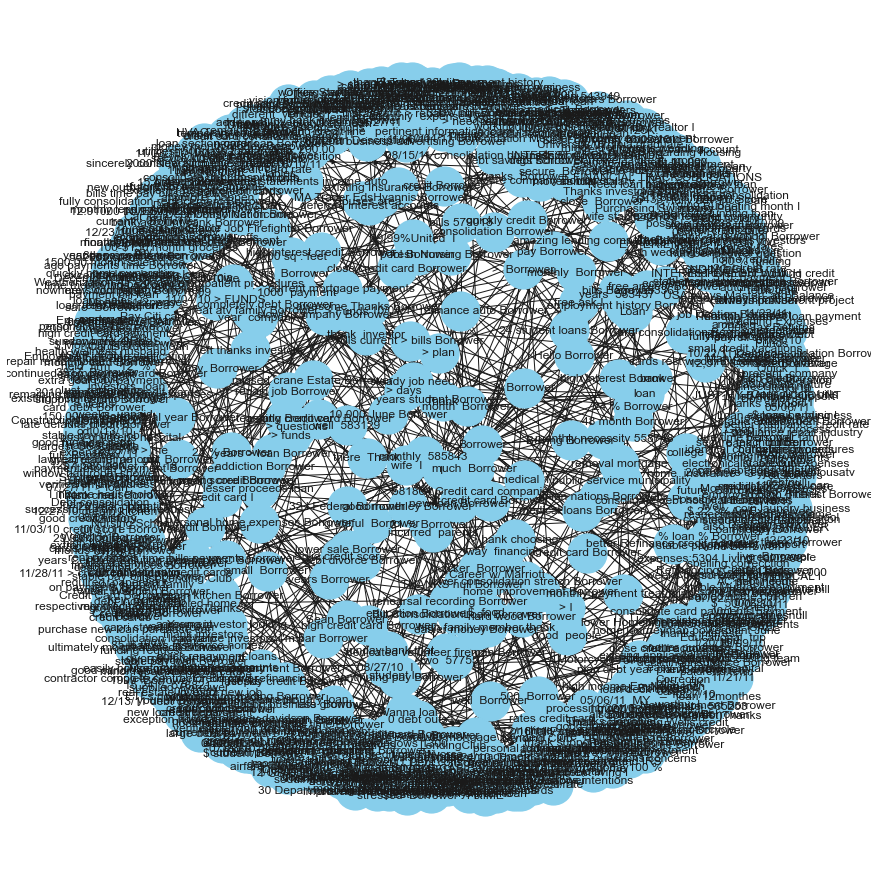

In [509]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="added"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [97]:
doc=nlp(ft_data['cleaned_desc'][0])
for tok in doc:
    print(tok.text," ----> ",tok.dep_," ----> ",tok.pos_)

I  ---->  nsubj  ---->  PRON
need  ---->  ROOT  ---->  VERB
upgrade  ---->  xcomp  ---->  VERB
business  ---->  compound  ---->  NOUN
technologies  ---->  dobj  ---->  NOUN
.  ---->  punct  ---->  PUNCT


In [467]:
ft_data.reset_index(drop=True,inplace=True)